# 1. Import Necessary Libraries

In [1]:
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

sns.set_theme()

# 2. Import Datasets

In [2]:
#player specific data
player_per_game = pd.read_csv("player_per_game.csv")
player_advanced = pd.read_csv("player_advanced.csv")

#team specific data
team_per_game = pd.read_csv("team_per_game.csv")
team_advanced = pd.read_csv("team_advanced.csv")
team_per_100 = pd.read_csv("team_per_100_pos.csv")
team_rating_and_rankings = pd.read_csv("team_rating_and_rankings.csv")


# opponent statistics by team
opponent_per_100 = pd.read_csv("opponent_per_100.csv")

# 3. Merging the Datasets

In [3]:
# merging team_advanced and team_per_game by team to create a full team data set
team_data = pd.merge(team_advanced, team_per_game, on = "Team")
#team_data = pd.merge(team_data, team_rating_and_rankings, on = "Team")


# aggregating player data bases by player name #
player_data = pd.merge(player_advanced, player_per_game, on = "Player")

'''
player_per_36.head()
team_per_game.head()
team_rating_and_rankings.head()
player_data.head()
'''
player_data.head()
team_data.head()

,Rk_x,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Utah Jazz*,28.5,52.0,20.0,55,17,9.25,-0.29,8.97,...,0.799,10.6,37.6,48.3,23.7,6.6,5.2,14.2,18.5,116.4
1,2.0,Los Angeles Clippers*,28.8,47.0,25.0,49,23,6.18,-0.16,6.02,...,0.839,9.4,34.7,44.2,24.4,7.1,4.1,13.2,19.2,114.0
2,3.0,Phoenix Suns*,26.6,51.0,21.0,49,23,5.82,-0.15,5.67,...,0.834,8.8,34.2,42.9,26.9,7.2,4.3,12.5,19.1,115.3
3,4.0,Milwaukee Bucks*,28.1,46.0,26.0,48,24,5.89,-0.32,5.57,...,0.760,10.3,37.8,48.1,25.5,8.1,4.6,13.8,17.3,120.1
4,5.0,Philadelphia 76ers*,27.1,49.0,23.0,48,24,5.58,-0.31,5.28,...,0.767,10.0,35.0,45.1,23.7,9.1,6.2,14.4,20.2,113.6


# 4. Cleaning the Data

In [4]:
player_data["Player_ID"] = player_per_game["Player"].str.split("\\").str.get(1)
player_data["Player"] = player_per_game["Player"].str.split("\\").str.get(0)
# separates the players name and the players ID #


team_per_game["Team"] = team_per_game["Team"].str.rstrip("*")
team_advanced["Team"] = team_advanced["Team"].str.rstrip("*")
team_data["Team"] = team_advanced["Team"].str.rstrip("*")
# removing an astrict that is at the end of each team name

# 5. Analysis

,Rk_x,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Utah Jazz,28.5,52.0,20.0,55,17,9.25,-0.29,8.97,...,0.799,10.6,37.6,48.3,23.7,6.6,5.2,14.2,18.5,116.4
1,2.0,Los Angeles Clippers,28.8,47.0,25.0,49,23,6.18,-0.16,6.02,...,0.839,9.4,34.7,44.2,24.4,7.1,4.1,13.2,19.2,114.0
2,3.0,Phoenix Suns,26.6,51.0,21.0,49,23,5.82,-0.15,5.67,...,0.834,8.8,34.2,42.9,26.9,7.2,4.3,12.5,19.1,115.3
3,4.0,Milwaukee Bucks,28.1,46.0,26.0,48,24,5.89,-0.32,5.57,...,0.760,10.3,37.8,48.1,25.5,8.1,4.6,13.8,17.3,120.1
4,5.0,Philadelphia 76ers,27.1,49.0,23.0,48,24,5.58,-0.31,5.28,...,0.767,10.0,35.0,45.1,23.7,9.1,6.2,14.4,20.2,113.6


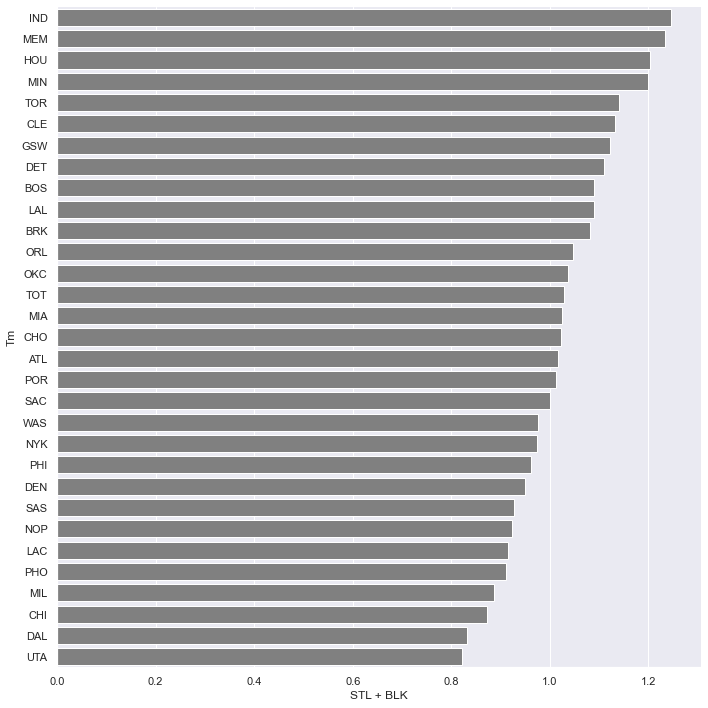

In [5]:
# creating a new column that combines steals and blocks per game for each player
player_per_game["STL + BLK"] = player_per_game["STL"] + player_per_game["BLK"]

# grouping the players by team then finding the average steal and block number per player per team
team_group_stat = player_per_game.groupby(by = "Tm")["STL + BLK"].mean().sort_values(ascending = False).reset_index()


#sorting by STL + BLK
player_per_game = player_per_game.sort_values("STL + BLK", ascending = True)
#print(team_group_stat)


''' need to find a way to merge the player values and the team values so we can compare wins to individual player values'''


# plots a bar graph of the STL + BLK average by team
sns.catplot(y = "Tm", x = "STL + BLK", kind = "bar", data = team_group_stat, color = "gray", height = 10)


#print(team_group_stat)
team_data.head()

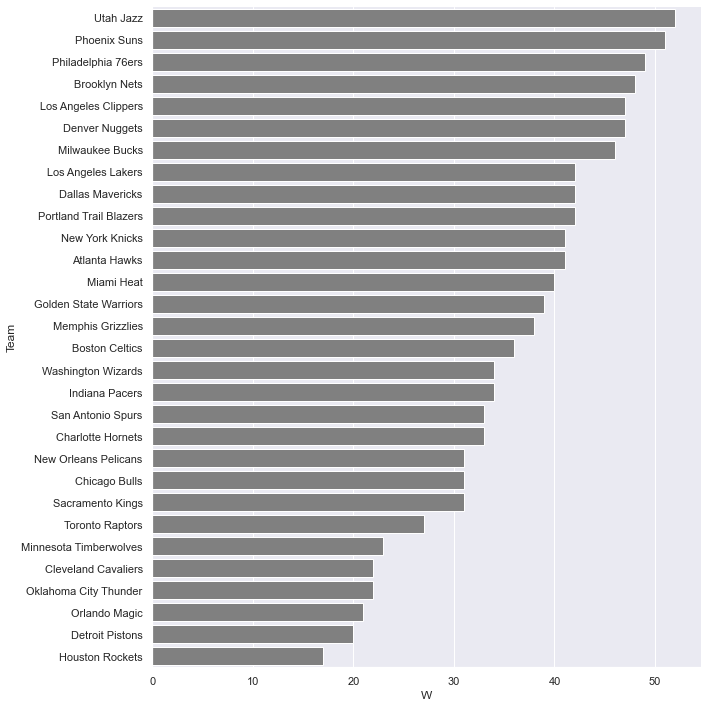

In [6]:
team_rating_and_rankings = team_rating_and_rankings.sort_values("W", ascending = False)

# plots teams in order of number of wins
sns.catplot(y = "Team", x = "W", kind = "bar", data = team_rating_and_rankings, color = "gray", height = 10)

<AxesSubplot:xlabel='DRtg', ylabel='W'>

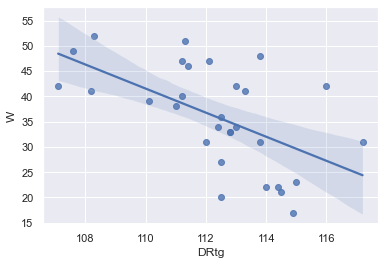

In [7]:
# higher defensive rating is BAD
sns.regplot(x = "DRtg", y = "W", data = team_data)


<AxesSubplot:xlabel='ORtg', ylabel='W'>

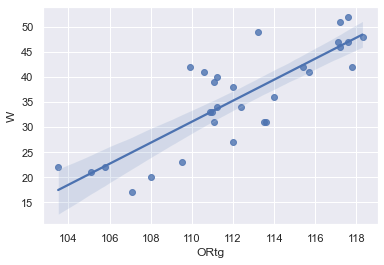

In [8]:
# higher offensive rating is GOOD
sns.regplot(x = "ORtg", y = "W", data = team_data)


In [9]:
team_data.columns

Index(['Rk_x', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS',
       'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'Unnamed: 17',
       'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'Unnamed: 22', 'eFG%.1', 'TOV%.1',
       'DRB%', 'FT/FGA.1', 'Unnamed: 27', 'Arena', 'Attend.', 'Attend./G',
       'Rk_y', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [10]:
team_advanced.columns

Index(['Rk', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg',
       'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'Unnamed: 17', 'eFG%',
       'TOV%', 'ORB%', 'FT/FGA', 'Unnamed: 22', 'eFG%.1', 'TOV%.1', 'DRB%',
       'FT/FGA.1', 'Unnamed: 27', 'Arena', 'Attend.', 'Attend./G'],
      dtype='object')

In [11]:
team_data.columns

Index(['Rk_x', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS',
       'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'Unnamed: 17',
       'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'Unnamed: 22', 'eFG%.1', 'TOV%.1',
       'DRB%', 'FT/FGA.1', 'Unnamed: 27', 'Arena', 'Attend.', 'Attend./G',
       'Rk_y', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [12]:
opponent_per_100.columns

Index(['Rk', 'Team', 'FG%', '3P%', '2P%', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

Slope: -3.592106271651994


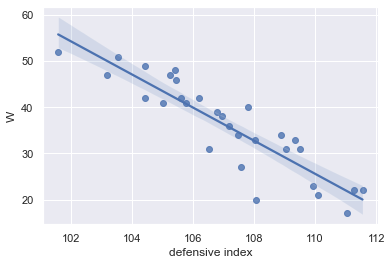

In [13]:

# creating our own defensive index using the opponent_per_100 dataset to understand the quality of defense
team_data["defensive index"] = (opponent_per_100["PTS"] / opponent_per_100["PTS"].abs().max() +
                                (opponent_per_100["3P%"] / opponent_per_100["3P%"].abs().max()) * 1.5 + 
                                opponent_per_100['2P%'] / opponent_per_100["2P%"].abs().max()
                                + team_advanced["eFG%.1"] / team_advanced["eFG%.1"].abs().max()) * 25
#team_data = team_data.sort_values(by = "defensive index")

di_w = sns.regplot(x = "defensive index", y = "W", data = team_data) # lowess= True

x_data = di_w.get_lines()[0].get_xdata()
y_data = di_w.get_lines()[0].get_ydata()

slope, intercept, r_value, p_value, std_err = stats.linregress(x_data,y_data)

print("Slope: " + str((slope)))


(31, 57)

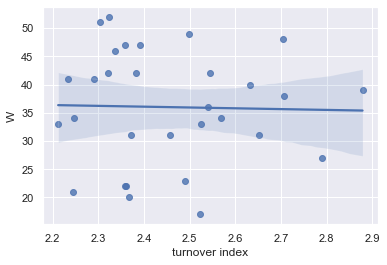

In [16]:
team_data["turnover index"] = (team_per_game["STL"] / team_per_game["STL"].abs().max() +
                                team_per_game["BLK"] / team_per_game["BLK"].abs().max() +
                                team_advanced["TOV%.1"] / team_advanced["TOV%.1"].abs().max()
                              )
# turnover index to analyze the value of the turnover in basketball

sns.regplot(x = "turnover index", y = "W", data = team_data)
team_data.shape

Slope: 2.4050460847658766


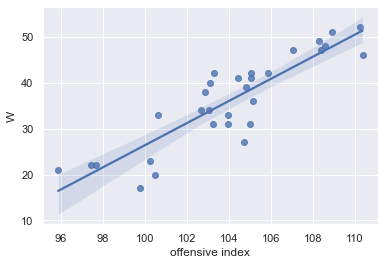

In [17]:
team_data["offensive index"] = (team_per_100["PTS"] / team_per_100["PTS"].abs().max() +
                                (team_per_100["3P%"] / team_per_100["3P%"].abs().max()) * 1.5 + 
                                team_per_100['2P%'] / team_per_100["2P%"].abs().max() +
                                team_advanced["eFG%"] / team_advanced["eFG%"].abs().max()) * 25


oi_w = sns.regplot(x = "offensive index", y = "W", data = team_data)

x_data = oi_w.get_lines()[0].get_xdata()
y_data = oi_w.get_lines()[0].get_ydata()

slope, intercept, r_value, p_value, std_err = stats.linregress(x_data,y_data)

print("Slope: " + str(slope))

In [ ]:
'''
IGNORE FOR NOW -- DOES NOT WORK

off_data = team_data[["DRtg", "STL", "BLK"]][:30].values

off_target = team_data["W"].dropna().values
off_lin_model = LinearRegression()
off_lin_model.fit(X = off_data, y = off_target)

team_data["predicted wins"] = off_lin_model.predict(off_data[:30])'''